## 문제 : 와인데이터 전체
##### [지금까지 배운 분류모델] 적용해보기
##### - 독립변수 : 특성을 자유롭게 조합해 가면서 검증해 보기
##### ........(특성을 자유롭게 조합하여 적용해 가면서 정확도 차이 확인)
##### ........(전체 특성을 모두 적용도 해보세요)
##### - 사용한 모델별로, 예측(predict) 을 통한 결과를, 데이터 프레임에 col_predict 컬럼명으로 추가

In [1]:
## [문제] 와인 데이터 사용
# 와인의 화학 조성을 사용하여 와인의 종류 예측(자유롭게)..

# ** 특성 이름을 담고 있는 key 값 = feature_names
# ** 특성 데이터를 담고 있는 key 값 = data
# ** 범주 와인의 종류를 담고 있는 key값 = target_names
#       - 범주는 'class_0'과 'class_1' 만 사용 (0과 1로 변경하여 사용)
#       - (0=레드와인, 1= 화이트와인)


# 알콜 (Alcohol)
# 말산 (Malic acid)
# 회분 (Ash)
# 회분의 알칼리도(Alcalinity of ash)
# 마그네슘(Magnesium)
# 총 폴리페놀(Total phenois)
# 플라보노이드 폴리페놀(Flavanoids)
# 비 플라보노이드 폴리페놀(Nonfiavanoid phenois)
# 프로안토시아닌(Proanthocyanins)
# 색상의 강도(Color intensity)
# 색상(Hue)
# 희석 와인의 00280/00315 비율 (00280/00315 of diluted wines)
# 프롤린(Proline)

In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
wine = load_wine()

In [3]:
wine_data = wine.data
wine_target = wine.target
df_wine = pd.DataFrame(data = wine_data, columns=wine.feature_names)
df_wine['target'] = wine.target

In [4]:
# pd.Series(wine.target[(wine.target==1) | (wine.target == 0)])

In [5]:
# df_wine = df_wine[df_wine['target'] !=2]
df_wine = df_wine[(df_wine['target'] == 0) | (df_wine['target'] == 1)]
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,1
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,1


In [6]:
wine_x = df_wine.iloc[:,:-1]
wine_y = df_wine.loc[:,'target']

In [7]:
wine_y.value_counts()

1    71
0    59
Name: target, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
train_input,test_input, train_target, test_target = train_test_split(wine_x,wine_y, test_size =0.25,random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## KNN 분류기

In [10]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
pred = kn.predict(test_scaled)
print('훈련 = ', kn.score(train_scaled, train_target))
print('테스트 = ',kn.score(test_scaled, test_target))

훈련 =  0.9690721649484536
테스트 =  0.9696969696969697


In [11]:
result0 = pd.DataFrame()
result0['target'] =test_target.reset_index(drop=True)
result0['pred'] = pd.Series(pred)

In [12]:
ok = sum(result0['target'] == result0['pred'])
nok = sum(result0['target'] != result0['pred'])
# 정답을 맞춘 갯수와 틀린 갯수 출력하기
# (출력 예시) 총 개수[159]건 중에, 정답갯수[149]건, 오답 갯수[10]건
print('총 개수[',len(test_target),']건 중에, 정답갯수[',ok,']건, 오답 갯수[',nok,']건')

# - 정답률과 오답률 출력하기
# (출력 예시) 총 100.0% 중 정답률(93.71%), 오답률(6.29%)
print('총(',len(test_target)/len(test_target)*100,'%)건 중에, 정답률[',round(ok/len(test_target)*100,2),'%], 오답률[',round(nok/len(test_target)*100,2),'%]')

총 개수[ 33 ]건 중에, 정답갯수[ 32 ]건, 오답 갯수[ 1 ]건
총( 100.0 %)건 중에, 정답률[ 96.97 %], 오답률[ 3.03 %]


#### 상관계수확인하기

In [13]:
abs(df_wine.corr()['target']).sort_values(ascending=False)

target                          1.000000
proline                         0.845296
alcohol                         0.824399
color_intensity                 0.750613
flavanoids                      0.610730
total_phenols                   0.532692
alcalinity_of_ash               0.470437
od280/od315_of_diluted_wines    0.391746
magnesium                       0.383085
ash                             0.354548
nonflavanoid_phenols            0.337489
proanthocyanins                 0.249205
malic_acid                      0.044302
hue                             0.017043
Name: target, dtype: float64

#### 절댓값 상위 3개 추출

In [14]:
wine_xx = df_wine[['proline','alcohol','color_intensity']]
from sklearn.model_selection import train_test_split
train_input,test_input, train_target, test_target = train_test_split(wine_xx,wine_y, test_size =0.25,random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [16]:
train_scaled.shape

(97, 3)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
pred = kn.predict(test_scaled)
print('훈련 = ', kn.score(train_scaled, train_target))
print('테스트 = ',kn.score(test_scaled, test_target))

훈련 =  0.9690721649484536
테스트 =  0.9696969696969697


In [18]:
result1 = pd.DataFrame()
result1['target'] =test_target.reset_index(drop=True)
result1['pred'] = pd.Series(pred)

In [19]:
ok = sum(result1['target'] == result1['pred'])
nok = sum(result1['target'] != result1['pred'])
# 정답을 맞춘 갯수와 틀린 갯수 출력하기
# (출력 예시) 총 개수[159]건 중에, 정답갯수[149]건, 오답 갯수[10]건
print('총 개수[',len(test_target),']건 중에, 정답갯수[',ok,']건, 오답 갯수[',nok,']건')

# - 정답률과 오답률 출력하기
# (출력 예시) 총 100.0% 중 정답률(93.71%), 오답률(6.29%)
print('총(',len(test_target)/len(test_target)*100,'%)건 중에, 정답률[',round(ok/len(test_target)*100,2),'%], 오답률[',round(nok/len(test_target)*100,2),'%]')

총 개수[ 33 ]건 중에, 정답갯수[ 32 ]건, 오답 갯수[ 1 ]건
총( 100.0 %)건 중에, 정답률[ 96.97 %], 오답률[ 3.03 %]


#### 중간값 3개 추출

In [20]:
wine_xxx = df_wine[['magnesium', 'ash' ,'nonflavanoid_phenols']]
from sklearn.model_selection import train_test_split
train_input,test_input, train_target, test_target = train_test_split(wine_xxx,wine_y, test_size =0.25,random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
pred = kn.predict(test_scaled)
print('훈련 = ', kn.score(train_scaled, train_target))
print('테스트 = ',kn.score(test_scaled, test_target))

훈련 =  0.8969072164948454
테스트 =  0.7878787878787878


In [23]:
result2 = pd.DataFrame()
result2['target'] =test_target.reset_index(drop=True)
result2['pred'] = pd.Series(pred)

In [24]:
ok = sum(result2['target'] == result2['pred'])
nok = sum(result2['target'] != result2['pred'])
# 정답을 맞춘 갯수와 틀린 갯수 출력하기
# (출력 예시) 총 개수[159]건 중에, 정답갯수[149]건, 오답 갯수[10]건
print('총 개수[',len(test_target),']건 중에, 정답갯수[',ok,']건, 오답 갯수[',nok,']건')

# - 정답률과 오답률 출력하기
# (출력 예시) 총 100.0% 중 정답률(93.71%), 오답률(6.29%)
print('총(',len(test_target)/len(test_target)*100,'%)건 중에, 정답률[',round(ok/len(test_target)*100,2),'%], 오답률[',round(nok/len(test_target)*100,2),'%]')

총 개수[ 33 ]건 중에, 정답갯수[ 26 ]건, 오답 갯수[ 7 ]건
총( 100.0 %)건 중에, 정답률[ 78.79 %], 오답률[ 21.21 %]


## 로지스틱회귀모델

In [25]:
wine_x = df_wine.iloc[:,:-1]
wine_y = df_wine.loc[:,'target']

In [26]:
from sklearn.model_selection import train_test_split
train_input,test_input, train_target, test_target = train_test_split(wine_x,wine_y, test_size =0.25,random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)
pred = lr.predict(test_scaled)
print('훈련 = ', lr.score(train_scaled, train_target))
print('테스트 = ' , lr.score(test_scaled , test_target))


### coef : 계수, intercept_ : y절편
print('계수 =',lr.coef_, ' y절편= ', lr.intercept_)

훈련 =  1.0
테스트 =  0.9696969696969697
계수 = [[-1.34042439 -0.42396492 -0.75514758  1.26006583 -0.38512244  0.20744561
  -0.32369922  0.15556911 -0.06902939 -0.64960182  0.13388669 -0.63907256
  -1.74766882]]  y절편=  [0.51706466]


In [29]:
train_scaled.shape

(97, 13)

In [30]:
result3 = pd.DataFrame()
result3['target'] =test_target.reset_index(drop=True)
result3['pred'] = pd.Series(pred)

In [31]:
ok = sum(result3['target'] == result3['pred'])
nok = sum(result3['target'] != result3['pred'])
# 정답을 맞춘 갯수와 틀린 갯수 출력하기
# (출력 예시) 총 개수[159]건 중에, 정답갯수[149]건, 오답 갯수[10]건
print('총 개수[',len(test_target),']건 중에, 정답갯수[',ok,']건, 오답 갯수[',nok,']건')

# - 정답률과 오답률 출력하기
# (출력 예시) 총 100.0% 중 정답률(93.71%), 오답률(6.29%)
print('총(',len(test_target)/len(test_target)*100,'%)건 중에, 정답률[',round(ok/len(test_target)*100,2),'%], 오답률[',round(nok/len(test_target)*100,2),'%]')

총 개수[ 33 ]건 중에, 정답갯수[ 32 ]건, 오답 갯수[ 1 ]건
총( 100.0 %)건 중에, 정답률[ 96.97 %], 오답률[ 3.03 %]


#### 중간값 3개 추출

In [32]:
wine_xxx = df_wine[['magnesium', 'ash' ,'nonflavanoid_phenols']]
from sklearn.model_selection import train_test_split
train_input,test_input, train_target, test_target = train_test_split(wine_xxx,wine_y, test_size =0.25,random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)
pred = lr.predict(test_scaled)
print('훈련 = ', lr.score(train_scaled, train_target))
print('테스트 = ' , lr.score(test_scaled , test_target))


### coef : 계수, intercept_ : y절편
print('계수 =',lr.coef_, ' y절편= ', lr.intercept_)

훈련 =  0.8247422680412371
테스트 =  0.7575757575757576
계수 = [[-1.01933292 -0.47143301  0.83462951]]  y절편=  [0.43030301]


In [35]:
result4 = pd.DataFrame()
result4['target'] =test_target.reset_index(drop=True)
result4['pred'] = pd.Series(pred)

In [36]:
ok = sum(result4['target'] == result4['pred'])
nok = sum(result4['target'] != result4['pred'])
# 정답을 맞춘 갯수와 틀린 갯수 출력하기
# (출력 예시) 총 개수[159]건 중에, 정답갯수[149]건, 오답 갯수[10]건
print('총 개수[',len(test_target),']건 중에, 정답갯수[',ok,']건, 오답 갯수[',nok,']건')

# - 정답률과 오답률 출력하기
# (출력 예시) 총 100.0% 중 정답률(93.71%), 오답률(6.29%)
print('총(',len(test_target)/len(test_target)*100,'%)건 중에, 정답률[',round(ok/len(test_target)*100,2),'%], 오답률[',round(nok/len(test_target)*100,2),'%]')

총 개수[ 33 ]건 중에, 정답갯수[ 25 ]건, 오답 갯수[ 8 ]건
총( 100.0 %)건 중에, 정답률[ 75.76 %], 오답률[ 24.24 %]


## 경사하강법

In [37]:
wine_x = df_wine.iloc[:,:-1]
wine_y = df_wine.loc[:,'target']

In [38]:
from sklearn.model_selection import train_test_split
train_input,test_input, train_target, test_target = train_test_split(wine_x,wine_y, test_size =0.25,random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [40]:
### 최적의 에포크값을 이용해서 처음부터 훈련 생성
### 사용 클래스(모델) : SGDClassifier

from sklearn.linear_model import SGDClassifier

# 클래스(모델)생성
# tol=None 훈련이 끝나더라도 스스로 판단하지말고 지정한 값만큼 무조건 돌아라
sc = SGDClassifier(loss = 'log', max_iter = 100, tol=None, random_state=42)

# 훈련 모델 생성하기
sc.fit(train_scaled, train_target)

### 훈련모델 분류 정확도 확인하기
# - 과적합 여부 확인을 위해 훈련 및 테스트 데이터 모두확인
print('훈련=', sc.score(train_scaled, train_target))
print('테스트=', sc.score(test_scaled,test_target))


### (해석)
# - 훈련모델의 학습능력이 다소 떨어집니다.
# - 이는 

훈련= 1.0
테스트= 1.0


C:\Users\admin\anaconda3\envs\django\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [41]:
import numpy as np
sc = SGDClassifier(loss = 'log', random_state = 42)

train_score = []
test_score = []

# 범주 고유값
classes = np.unique(train_target)

# 반복을 300회 이상으로 테스트하여 정확도를 리스트에 저장
for _ in range(0, 300) :
    sc.partial_fit(train_scaled, train_target, classes = classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target)) 

C:\Users\admin\anaconda3\envs\django\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\envs\django\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\envs\django\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\envs\django\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
 

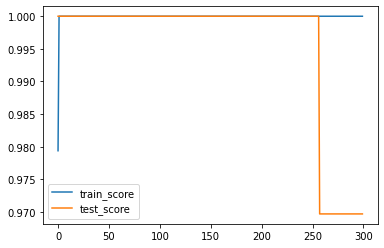

In [43]:
### 최적의 에포크 위치확인하기 : 시각화
import matplotlib.pyplot as plt

plt.plot(train_score, label = 'train_score')
plt.plot(test_score, label = 'test_score')
plt.legend()
plt.show()

## 가장 가까우면서, test가 유지되면서, train이 변화하는 시작점

### 결정계수 중간 3개값 추출

In [72]:
wine_xx = df_wine[['magnesium', 'ash' ,'nonflavanoid_phenols']]

In [73]:
from sklearn.model_selection import train_test_split
train_input,test_input, train_target, test_target = train_test_split(wine_xx,wine_y, test_size =0.25,random_state=42)

In [74]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [76]:
### 최적의 에포크값을 이용해서 처음부터 훈련 생성
### 사용 클래스(모델) : SGDClassifier

from sklearn.linear_model import SGDClassifier

# 클래스(모델)생성
# tol=None 훈련이 끝나더라도 스스로 판단하지말고 지정한 값만큼 무조건 돌아라
sc = SGDClassifier(loss = 'log', max_iter = 100, tol=None, random_state=42)

# 훈련 모델 생성하기
sc.fit(train_scaled, train_target)

### 훈련모델 분류 정확도 확인하기
# - 과적합 여부 확인을 위해 훈련 및 테스트 데이터 모두확인
print('훈련=', sc.score(train_scaled, train_target))
print('테스트=', sc.score(test_scaled,test_target))


### (해석)
# - 훈련모델의 학습능력이 다소 떨어집니다.
# - 이는 

훈련= 0.8041237113402062
테스트= 0.7272727272727273


C:\Users\admin\anaconda3\envs\django\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [77]:
import numpy as np
sc = SGDClassifier(loss = 'log', random_state = 42)

train_score = []
test_score = []

# 범주 고유값
classes = np.unique(train_target)

# 반복을 300회 이상으로 테스트하여 정확도를 리스트에 저장
for _ in range(0, 300) :
    sc.partial_fit(train_scaled, train_target, classes = classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target)) 

C:\Users\admin\anaconda3\envs\django\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\envs\django\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\envs\django\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\envs\django\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
 

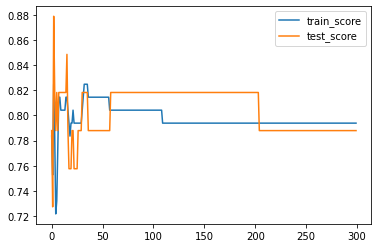

In [78]:
### 최적의 에포크 위치확인하기 : 시각화
import matplotlib.pyplot as plt

plt.plot(train_score, label = 'train_score')
plt.plot(test_score, label = 'test_score')
plt.legend()
plt.show()

## 가장 가까우면서, test가 유지되면서, train이 변화하는 시작점

## 결정트리

In [45]:
wine_x = df_wine.iloc[:,:-1]
wine_y = df_wine.loc[:,'target']

##### - 결정계수 중간 3개값 추출

In [56]:
wine_xx = df_wine[['magnesium', 'ash' ,'nonflavanoid_phenols']]

In [57]:
from sklearn.model_selection import train_test_split
train_input,test_input, train_target, test_target = train_test_split(wine_xx,wine_y, test_size =0.25,random_state=42)

In [58]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

0.8865979381443299
0.7272727272727273


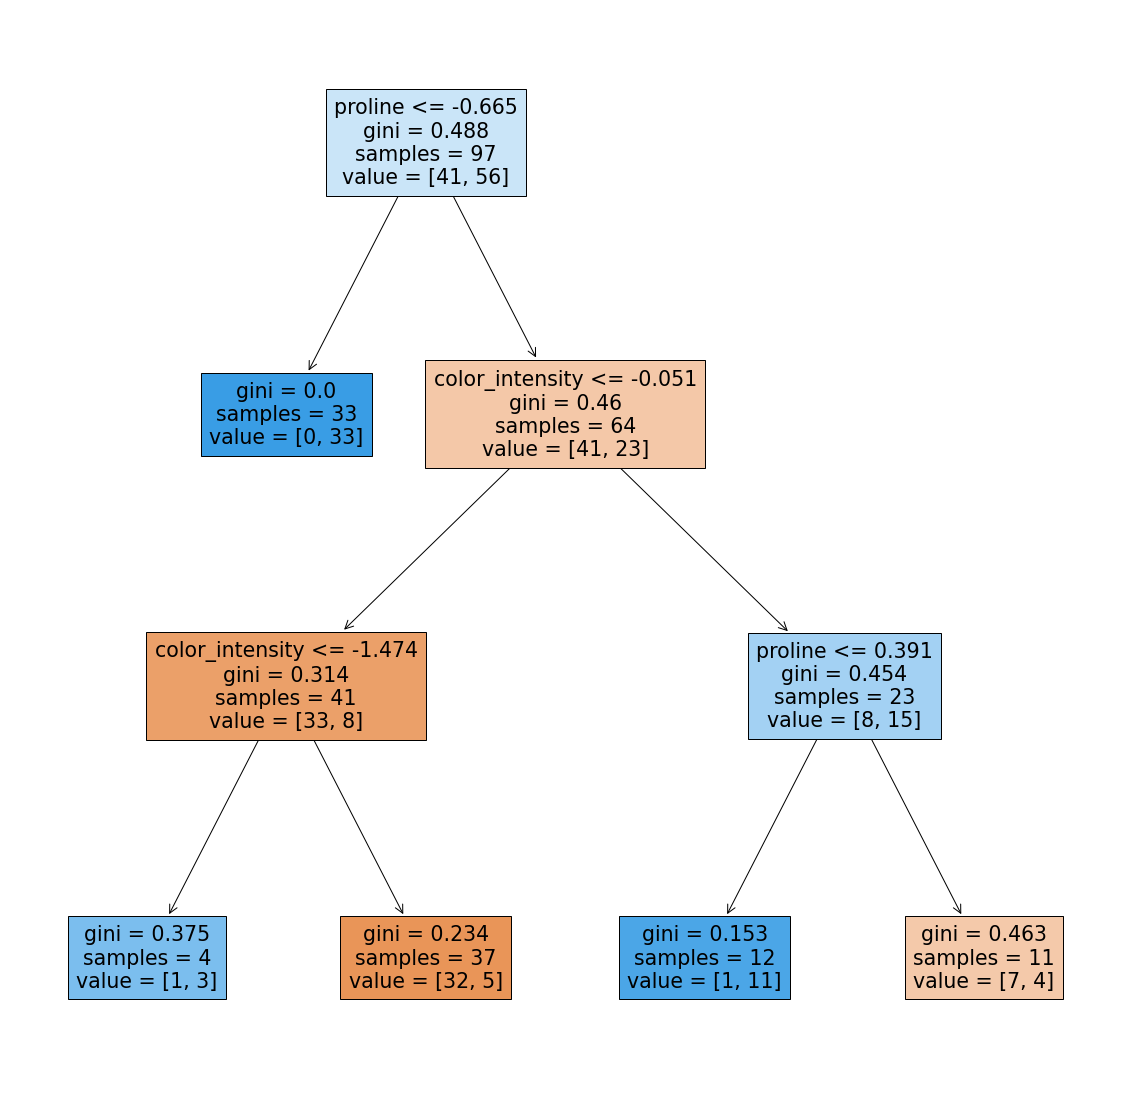

In [59]:
### 결정트리 패키지 불러오기
from sklearn.tree import DecisionTreeClassifier

### 클래스 생성하기
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)

### 훈련모델 생성하기
dt.fit(train_scaled, train_target)

### 훈련 및 테스트 데이터 정확도 확인하기
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# max_depth : 트리의 깊이(첫번재를 제외하고 2개까지 만들기)
# filled : 독립변수별로 색으로 구분
# feature_names : 사용된 독립변수 이름
plt.figure(figsize=(20,20))
plot_tree(dt, max_depth=4, filled=True, 
         feature_names = ['proline','alcohol','color_intensity'])
plt.show()

In [60]:
print(dt.feature_importances_)

[0.70643849 0.         0.29356151]


#### 독립변수 하나 제거 변수중요도 0인것

In [66]:
wine_xx2 = df_wine[['magnesium','nonflavanoid_phenols']]

In [67]:
from sklearn.model_selection import train_test_split
train_input,test_input, train_target, test_target = train_test_split(wine_xx2,wine_y, test_size =0.25,random_state=42)

In [68]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

0.8865979381443299
0.7272727272727273


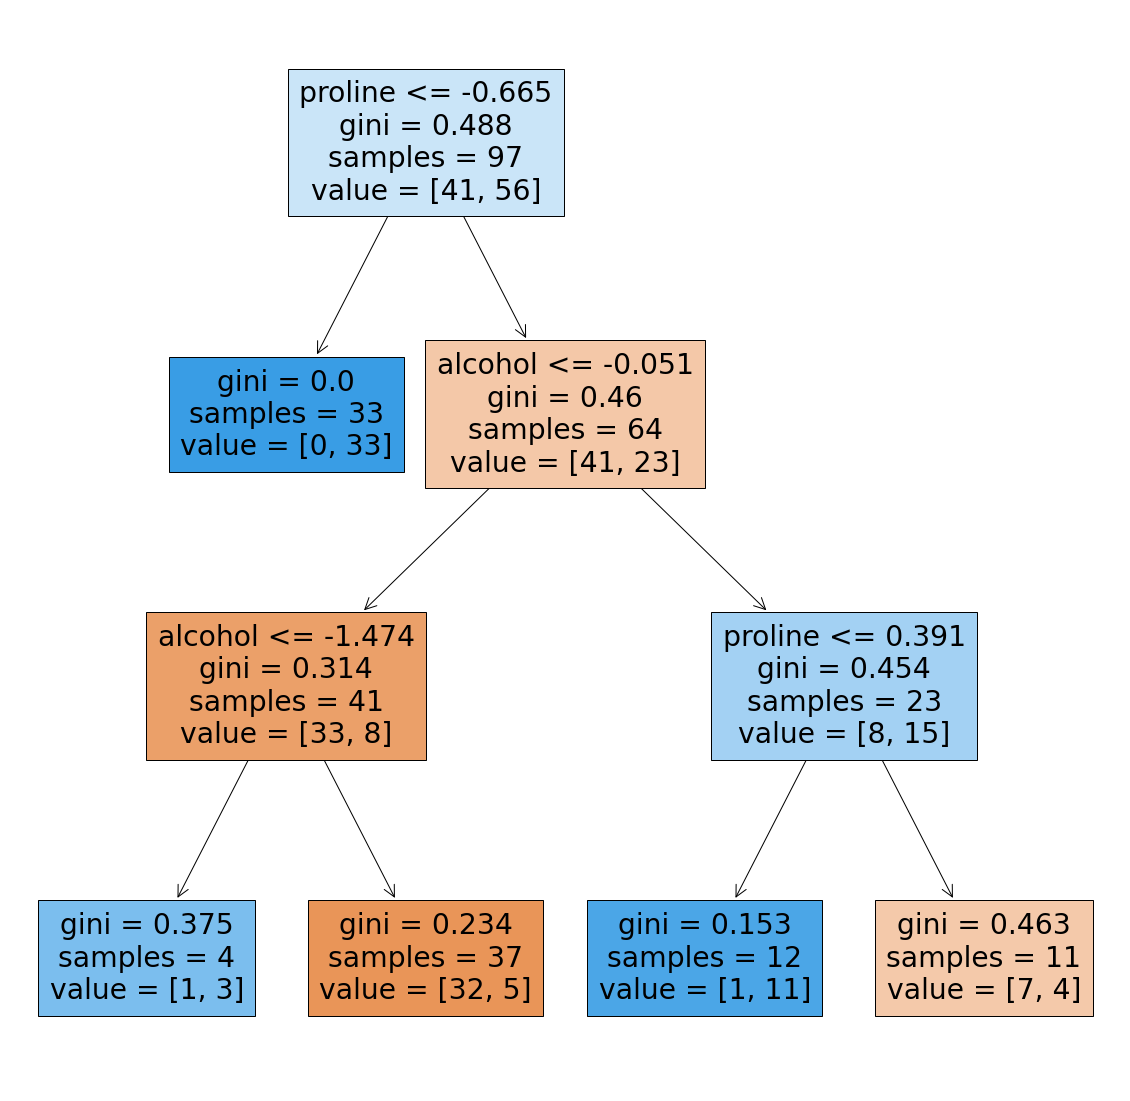

In [69]:
### 결정트리 패키지 불러오기
from sklearn.tree import DecisionTreeClassifier

### 클래스 생성하기
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)

### 훈련모델 생성하기
dt.fit(train_scaled, train_target)

### 훈련 및 테스트 데이터 정확도 확인하기
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# max_depth : 트리의 깊이(첫번재를 제외하고 2개까지 만들기)
# filled : 독립변수별로 색으로 구분
# feature_names : 사용된 독립변수 이름
plt.figure(figsize=(20,20))
plot_tree(dt, max_depth=4, filled=True, 
         feature_names = ['proline','alcohol','color_intensity'])
plt.show()

In [71]:
print(dt.feature_importances_)
# ((해석))
# 변수중요도 0인거 제거하면 결과가 똑같다

[0.70643849 0.29356151]


#### 질문 : 범주가 여러개일때 주로 사용하는 분류알고리즘이랑 이진분류때 주로 사용하는 알고리즘이 따로 있는건지